# Практическое задание

Визуализация набора данных MNIST

In [1]:
from sklearn import datasets
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np

digits = datasets.load_digits()
X = digits.data
y = digits.target

In [2]:
y[:10]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [3]:
X.shape

(1797, 64)

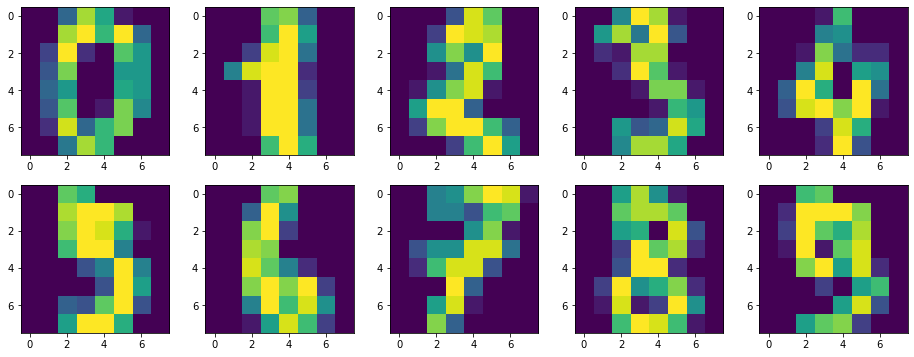

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X[i,:].reshape([8,8]))

### train test split

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2)

X_train.shape, X_test.shape

((1437, 64), (360, 64))

## Обучение модели

In [6]:
%%time
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier (random_state = 1)
model.fit(X_train, y_train)

CPU times: user 69.6 ms, sys: 17.8 ms, total: 87.4 ms
Wall time: 200 ms


DecisionTreeClassifier(random_state=1)

In [7]:
pred_train = model.predict(X_train)
pred_train

array([4, 9, 6, ..., 9, 1, 5])

In [8]:
train_preds = pd.DataFrame(pred_train, columns=['pred'])
train_preds['true'] = y_train
train_preds

,pred,true
0,4,4
1,9,9
2,6,6
3,4,4
4,2,2
...,...,...
1432,8,8
1433,4,4
1434,9,9
1435,1,1


## Валидация

In [9]:
pred_test = model.predict(
    X_test
)

In [10]:
test_preds = pd.DataFrame(pred_test, columns=['pred'])
test_preds ['true'] = y_test
test_preds

,pred,true
0,1,1
1,5,5
2,0,0
3,7,7
4,1,1
...,...,...
355,4,4
356,9,9
357,4,4
358,2,2


## Снижение переобучения

In [11]:
%%time

model = DecisionTreeClassifier(random_state = 1, min_samples_leaf = 5, max_depth = 9)
model.fit(X_train, y_train)

CPU times: user 20.4 ms, sys: 0 ns, total: 20.4 ms
Wall time: 19.5 ms


DecisionTreeClassifier(max_depth=9, min_samples_leaf=5, random_state=1)

In [12]:
pred_train = model.predict(X_train)

train_preds = pd.DataFrame(pred_train, columns=['pred'])
train_preds ['true'] = y_train

train_preds

,pred,true
0,4,4
1,9,9
2,6,6
3,4,4
4,2,2
...,...,...
1432,8,8
1433,4,4
1434,9,9
1435,1,1


## Валидация

In [13]:
pred_test = model.predict(X_test)

test_preds = pd.DataFrame(pred_test, columns=['pred'])
test_preds ['true'] = y_test

test_preds

,pred,true
0,1,1
1,5,5
2,0,0
3,7,7
4,1,1
...,...,...
355,4,4
356,9,9
357,4,4
358,2,2


In [14]:
print(f"Accuracy модели на обучающей выборке {accuracy_score(y_train, pred_train)}"),
print(f"Accuracy модели на тестовой выборке {accuracy_score(y_test, pred_test)}")

Accuracy модели на обучающей выборке 0.9178844815588031
Accuracy модели на тестовой выборке 0.8527777777777777


# Дополнительные материалы:
1. Дерево решений для задачи регрессии https://youtu.be/0mMeaC3gjNI
2. Дерево решений для задачи классификации https://youtu.be/j8L07nuns2Y
3. Критерии останова для дерева решений https://youtu.be/aWEdaXAZ01M
4. Метрика accuracy https://youtu.be/CCH-1gJo_z0
5. Переобучение/недообучение https://youtu.be/m7P7bnLxIc4